In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from fastai.vision.all import *
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


"import os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [3]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or Kaggle, which makes some difference for the code below.
try:
    import google.colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [4]:
# This is copied from Howard's notebook: https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data


#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [5]:
# Make sure we're using the latest version of fastai
if colab:
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book()

elif kaggle:
    !pip install -Uqq fastai

In [6]:
from pathlib import Path
if colab:
    from google.colab import drive
    drive.mount("/content/gdrive")
    DATA = Path('/content/gdrive/MyDrive/DAT255/')
    DATA.mkdir(exist_ok=True, parents=True)
    
elif kaggle:
    DATA = Path('/kaggle/input/testtt')
    

In [7]:
DATA.ls()

(#7) [Path('/kaggle/input/testtt/surprise'),Path('/kaggle/input/testtt/fear'),Path('/kaggle/input/testtt/angry'),Path('/kaggle/input/testtt/neutral'),Path('/kaggle/input/testtt/sad'),Path('/kaggle/input/testtt/disgust'),Path('/kaggle/input/testtt/happy')]

In [8]:
get_image_files(DATA)[:5]

(#5) [Path('/kaggle/input/testtt/surprise/127_33.jpg'),Path('/kaggle/input/testtt/surprise/139_4.jpg'),Path('/kaggle/input/testtt/surprise/69_19.jpg'),Path('/kaggle/input/testtt/surprise/125_19.jpg'),Path('/kaggle/input/testtt/surprise/58_23.jpg')]

In [9]:
ansikt = DataBlock(
    blocks=(ImageBlock, CategoryBlock),             # Define data types for the input and output
    get_items=get_image_files,                      # Function to get image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42),# Split data based on grandparent folder name
    get_y=parent_label,                             # Get labels from parent folder names
    item_tfms=Resize(224),                          # Resize images to 224x224
    batch_tfms=[
        *aug_transforms(),                          # Apply some data augmentation (see Chapter 2)
        Normalize.from_stats(*imagenet_stats)       # Normalize image intensities (because pretraining)
    ]
)




In [41]:
dls = ansikt.dataloaders(DATA, bs=64)

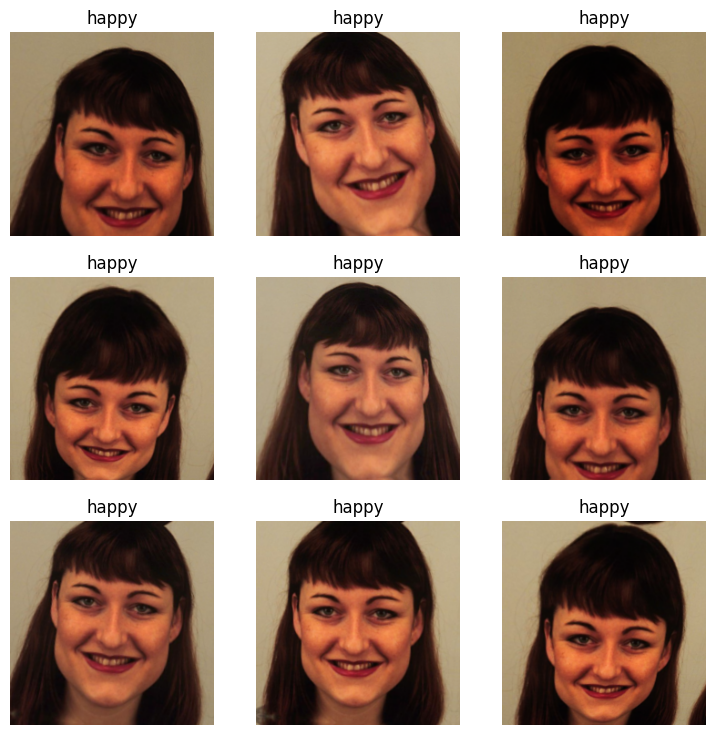

In [42]:
dls.show_batch(unique=True)

In [43]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

In [44]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.547217,1.534757,0.459966,00:13


epoch,train_loss,valid_loss,accuracy,time
0,1.586000,0.828908,0.688245,00:15
1,1.168431,0.591146,0.802385,00:15
2,0.830075,0.435050,0.863714,00:15
3,0.623573,0.394401,0.863714,00:15


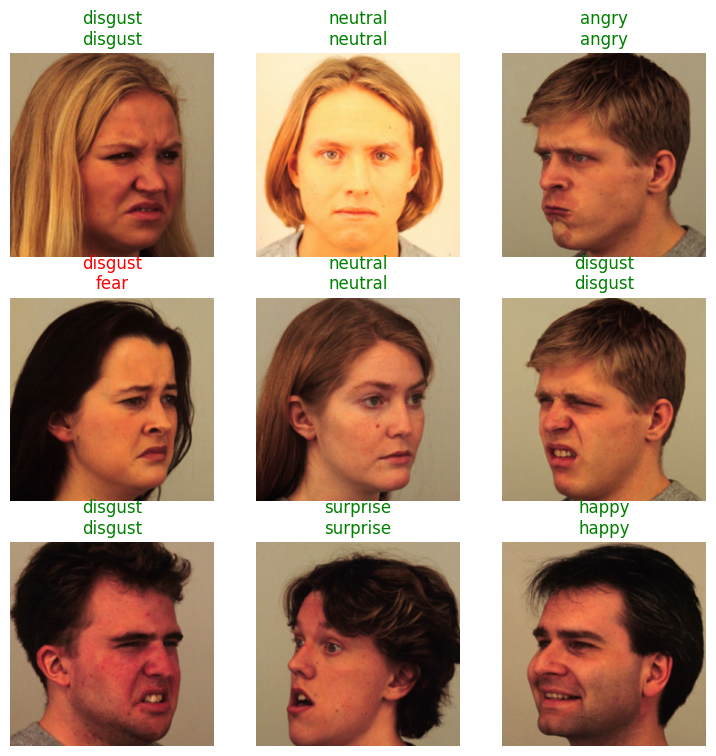

In [45]:
learn.show_results()

In [48]:
learn.save('my_model')

Path('models/my_model.pth')

In [ ]:
#learn.load('my_learner.pkl')


Predicted emotion: angry
Predictions index: 0
Probabilities: tensor([5.7802e-01, 2.9485e-01, 1.5412e-03, 1.3489e-04, 1.0129e-02, 1.1520e-01,
        1.2483e-04])


<Axes: >

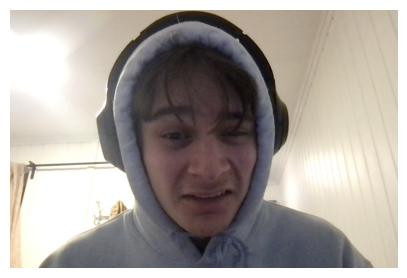

In [49]:
# Eget bilde
img = PILImage.create('/kaggle/input/bilder/Photo2.jpg')

# Get predictions
pred_class, pred_idx, outputs = learn.predict(img)

# Print results
print(f'Predicted emotion: {pred_class}')
print(f'Predictions index: {pred_idx}')
print(f'Probabilities: {outputs}')

img.show()

Predicted emotion: angry
Predictions index: 0
Probabilities: tensor([0.7690, 0.1087, 0.0155, 0.0705, 0.0203, 0.0145, 0.0016])


<Axes: >

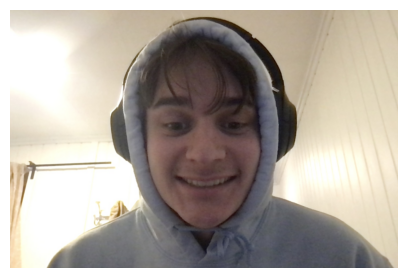

In [38]:
# Eget bilde
img = PILImage.create('/kaggle/input/bilder/Photo.jpg')

# Get predictions (no need to apply after_batch transforms explicitly, predict does that)
pred_class, pred_idx, outputs = learn.predict(img)

# Print results
print(f'Predicted emotion: {pred_class}')
print(f'Predictions index: {pred_idx}')
print(f'Probabilities: {outputs}')

# Show the image
img.show()